<a href="https://colab.research.google.com/github/Sushobhan55/Algo/blob/master/Efficient%20Frontier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This program optimizes a stock portfolio using the Efficient Frontier

In [3]:
# import the required libraries
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import datetime as dt
import seaborn as sns

In [4]:
#get the start and end dates for the stocks for backtesting
start = dt.datetime(2016,1,1)
end = dt.datetime.now()

In [5]:
#get the tickers in the portfolio
tickers = ['AAPL','AMZN','GM','JNJ','NVDA','TXN','TSLA','SWKS','MS','ETSY','CLX','NFLX','LUV','XOM','TSM','GOOGL','DIS','JPM','PG','TDOC']

In [6]:
#assign weights to the stocks
weights = np.array(20*[0.05])

In [7]:
#create a dataframe to store the adjusted close price of the stocks
my_portfolio = pd.DataFrame()

In [8]:
#store the adjusted close price of the stock into the dataframe
for ticker in tickers:
  my_portfolio[ticker]=web.DataReader(ticker,'yahoo',start,end)['Adj Close']

In [ ]:
my_portfolio.head()

Text(0, 0.5, 'Adj Close in USD')

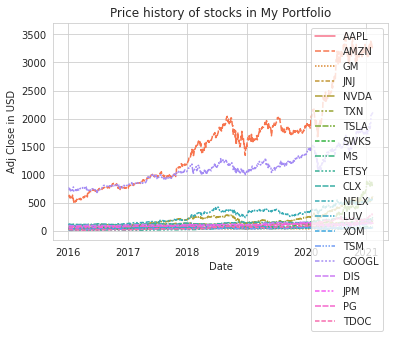

In [9]:
#visualize the portfolio
sns.set_style('whitegrid')
chart= sns.lineplot(data=my_portfolio)
chart.set_title('Price history of stocks in My Portfolio')
chart.set_ylabel('Adj Close in USD')

In [ ]:
#store the daily returns on individual stocks
returns = my_portfolio.pct_change()
returns = returns.dropna()
returns

In [11]:
#create the annualized variance-covariance matrix
annual_varcov_matrix = returns.cov()*252
annual_varcov_matrix

,AAPL,AMZN,GM,JNJ,NVDA,TXN,TSLA,SWKS,MS,ETSY,CLX,NFLX,LUV,XOM,TSM,GOOGL,DIS,JPM,PG,TDOC
AAPL,0.091277,0.054558,0.039670,0.025132,0.079595,0.054250,0.067620,0.077580,0.054859,0.062395,0.014509,0.056049,0.037471,0.033381,0.049402,0.051782,0.036606,0.042151,0.025253,0.049041
AMZN,0.054558,0.091375,0.024422,0.018113,0.073688,0.044812,0.063681,0.055037,0.037691,0.067967,0.011381,0.072333,0.023168,0.020379,0.039646,0.052874,0.026117,0.025412,0.017685,0.062133
GM,0.039670,0.024422,0.132484,0.021528,0.059470,0.049363,0.059888,0.066219,0.076718,0.043785,-0.003445,0.028393,0.067564,0.057648,0.043899,0.041650,0.051770,0.070134,0.017651,0.011131
JNJ,0.025132,0.018113,0.021528,0.039367,0.028451,0.026111,0.018039,0.027961,0.031232,0.025961,0.014311,0.017306,0.020723,0.023973,0.020272,0.023248,0.020970,0.026555,0.022375,0.012259
NVDA,0.079595,0.073688,0.059470,0.028451,0.224535,0.087092,0.099484,0.103611,0.072948,0.091916,0.016362,0.083854,0.046803,0.040408,0.077076,0.069716,0.044918,0.051410,0.028167,0.081012
TXN,0.054250,0.044812,0.049363,0.026111,0.087092,0.084773,0.055834,0.084638,0.059281,0.054709,0.013795,0.052051,0.044960,0.039853,0.057404,0.047532,0.038407,0.047944,0.025210,0.038561
TSLA,0.067620,0.063681,0.059888,0.018039,0.099484,0.055834,0.333676,0.084367,0.058611,0.075173,0.011923,0.077306,0.039813,0.038250,0.058293,0.055282,0.042108,0.044467,0.018927,0.066422
SWKS,0.077580,0.055037,0.066219,0.027961,0.103611,0.084638,0.084367,0.156570,0.075801,0.073193,0.012767,0.061965,0.052128,0.048276,0.070778,0.058834,0.046333,0.059091,0.027716,0.051978
MS,0.054859,0.037691,0.076718,0.031232,0.072948,0.059281,0.058611,0.075801,0.121455,0.054984,0.005345,0.039839,0.071584,0.062200,0.051353,0.049336,0.058123,0.092769,0.027269,0.025836
ETSY,0.062395,0.067967,0.043785,0.025961,0.091916,0.054709,0.075173,0.073193,0.054984,0.311768,0.016635,0.074470,0.038922,0.024436,0.052722,0.054249,0.031786,0.035972,0.020673,0.098119


In [12]:
#calculate the portfolio variance
portfolio_var = np.dot(weights.T, np.dot(annual_varcov_matrix, weights))
portfolio_var

0.04676055267067326

In [13]:
#calculate the portfolio volatility/standard deviation
portfolio_vol = np.sqrt(portfolio_var)
portfolio_vol

0.21624188463540836

In [14]:
#calcualte the annual portfolio return
annual_potfolio_return = np.sum(returns.mean()*weights) * 252
annual_potfolio_return

0.3367423961017082

In [15]:
#show the expected return and risk(volatility) 
print('Expected annual return: ',round(annual_potfolio_return,2)*100,'%')
print('Risk/Annual volatility: ',round(portfolio_vol,2)*100,'%')

Expected annual return:  34.0 %
Risk/Annual volatility:  22.0 %


In [ ]:
#we need higher return for a lower risk
#now we optimize the portfolio by using a library PyPortfolioOpt

In [ ]:
pip install PyPortfolioOpt

In [17]:
#import the libraries for portfolio optimization 
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import objective_functions

In [18]:
#calculate the expected return and 
#the annualized sample covariance matrix of individual returns
mu = expected_returns.mean_historical_return(my_portfolio)
S = risk_models.sample_cov(my_portfolio)

In [19]:
#optimize for maximum sharpe ratio
ef = EfficientFrontier(mu,S)
ef.add_objective(objective_functions.L2_reg, gamma=2)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
ef.portfolio_performance(verbose = True)
print(cleaned_weights)

Expected annual return: 59.1%
Annual volatility: 28.3%
Sharpe Ratio: 2.02
OrderedDict([('AAPL', 0.0613), ('AMZN', 0.05755), ('GM', 0.00706), ('JNJ', 0.01615), ('NVDA', 0.13686), ('TXN', 0.04026), ('TSLA', 0.12862), ('SWKS', 0.01127), ('MS', 0.02175), ('ETSY', 0.16372), ('CLX', 0.01416), ('NFLX', 0.05125), ('LUV', 0.0), ('XOM', 0.0), ('TSM', 0.08699), ('GOOGL', 0.02333), ('DIS', 0.01152), ('JPM', 0.02609), ('PG', 0.01762), ('TDOC', 0.12447)])


/usr/local/lib/python3.6/dist-packages/pypfopt/efficient_frontier.py:248: UserWarning: max_sharpe transforms the optimisation problem so additional objectives may not work as expected.
  "max_sharpe transforms the optimisation problem so additional objectives may not work as expected."


In [20]:
#get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(my_portfolio)
weights=cleaned_weights
da = DiscreteAllocation(weights,latest_prices, total_portfolio_value=1000000)
allocation , leftover = da.lp_portfolio()
print('Discrete allocation: ', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation:  {'AAPL': 460, 'AMZN': 18, 'GM': 132, 'JNJ': 97, 'NVDA': 223, 'TXN': 222, 'TSLA': 161, 'SWKS': 58, 'MS': 286, 'ETSY': 717, 'CLX': 77, 'NFLX': 92, 'TSM': 621, 'GOOGL': 11, 'DIS': 62, 'JPM': 180, 'PG': 137, 'TDOC': 427}
Funds remaining: $2.28


In [ ]:
#i will be implementing this exact optimization in my fantasy portfolio in CUNY Student Investmet Challenge
#which will be concluded in may of 2021, and I shall update the effectiveness or the result of 
#this optimization in an actual market data